<h1> Trabalho Prático de Inteligência Artificial - Rede CNN</h1>

 - Aluno: Rafaela Werle


<h2> Objetivo do Trabalho: </h2>

Deve ser implementada uma rede neural do tipo Convolutional Neural Network (CNN) para a classificação de 
imagens. 
A rede deve ser implementada do zero utilizando o [Keras](https://keras.io/). 

A rede neural deve ser treinada e testada em um conjunto de dados de escolha do grupo. O dataset deve abordar 
o problema de classificação de imagens.

<h2> 1º Passo - Representação do Problema - Escolha e Configuração inicial do DataSet </h2>

Eu escolhi o dataset do Kaggle [BIRDS 400 - SPECIES IMAGE CLASSIFICATION](https://www.kaggle.com/datasets/gpiosenka/100-bird-species). 
O Conjunto de dados possui 400 espécies de aves.
Sendo, 58388 imagens de treinamento, 2000 imagens de teste (5 imagens por espécie) e 2000 imagens de validação (5 imagens por espécie).  
As imagens possuem tamanho de 224x224, e formato de cores RGB. Todas elas possuem apenas 1 pássaro que ocupa cerca de 50% da imagem.

O principal objetivo desse trabalho é conseguir gerar uma rede CNN que consiga realizar a classificação correta das espécies, considerando o conjunto de teste, para cada imagem a rede deve predizer qual a espécie correspondente.

Decidi, como sugestão do professor, reduzir o número de espécies possíveis para facilitar a resolução do problema, dessa forma trabalharei com 10 espécies, as quais serão definidas no código.

Inicialmente, utilizei um código padrão para acessar e realizar o download do dataset. 
Após descompactar, criei um diretório '100-bird-species/' que será o root e joguei todos os arquivos lá. 

A estrutura deve ser a seguinte:

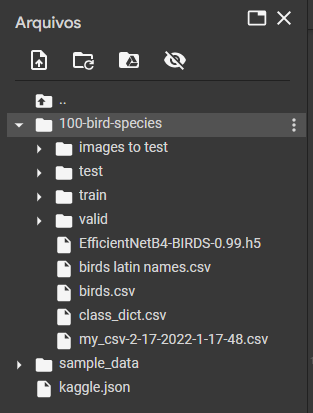

In [1]:
# DOWNLOAD E CONEXÃO COM KAGGLE PARA ACESSAR DATASET
! pip install -q kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle competitions download -c 'spaceship-titanic'
#DOWNLOAD DO DATASET
! kaggle datasets download gpiosenka/100-bird-species
! unzip 100-bird-species

A saída de streaming foi truncada nas últimas 5000 linhas.
  inflating: train/VERMILION FLYCATHER/102.jpg  
  inflating: train/VERMILION FLYCATHER/103.jpg  
  inflating: train/VERMILION FLYCATHER/104.jpg  
  inflating: train/VERMILION FLYCATHER/105.jpg  
  inflating: train/VERMILION FLYCATHER/106.jpg  
  inflating: train/VERMILION FLYCATHER/107.jpg  
  inflating: train/VERMILION FLYCATHER/108.jpg  
  inflating: train/VERMILION FLYCATHER/109.jpg  
  inflating: train/VERMILION FLYCATHER/110.jpg  
  inflating: train/VERMILION FLYCATHER/111.jpg  
  inflating: train/VERMILION FLYCATHER/112.jpg  
  inflating: train/VERMILION FLYCATHER/113.jpg  
  inflating: train/VERMILION FLYCATHER/114.jpg  
  inflating: train/VERMILION FLYCATHER/115.jpg  
  inflating: train/VERMILION FLYCATHER/116.jpg  
  inflating: train/VERMILION FLYCATHER/117.jpg  
  inflating: train/VERMILION FLYCATHER/118.jpg  
  inflating: train/VERMILION FLYCATHER/119.jpg  
  inflating: train/VERMILION FLYCATHER/120.jpg  
  inflatin

<h3> 2º Passo - Importando as bibliotecas</h3>

Importação das bibliotecas necessárias Tensorflow/Keras.

In [2]:
#bibliotecas
import tensorflow
from tensorflow import keras
import tensorflow_hub as hub
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.callbacks import ModelCheckpoint
from keras.utils.np_utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

<h3> 3º Passo - Definindo os diretórios </h3>

Defini os diretórios raiz e das imagens de treino, validação e teste.

In [3]:
#DIRETÓRIO RAIZ DO DATASET
data_root='100-bird-species/'
#SEPARAÇÃO DAS IMAGENS EM TREINO E TESTE
train_data_dir = str(data_root+'train')
test_data_dir = str(data_root+'test')

<h3> 4º Passo - Realizando os ajustes necessários nos dados </h3>

Realizei a reescalação das imagens que estão no padrão 255, e defini a porcentagem de validação em 20% da amostra. 

Após isso fiz a geração dos dados de treino, validação e teste, utilizando a função 'ImageDataGenerator' e pegando os arquivos dos respectivos diretórios, e já definindo quais as classes que serão utilizadas. 

In [4]:
image_shape = (224,224) #TAMANHO DA IMAGEM
data_kwargs = dict(rescale=1./255, validation_split=.20) #AJUSTE DA ESCALA E VALIDAÇÃO

#GERAÇÃO DOS DADOS A PARTIR DAS AMOSTRAS DE TREINO, VALIDAÇÃO E TESTE.
train_data = ImageDataGenerator(**data_kwargs)
train_generator = train_data.flow_from_directory(
    train_data_dir, #DIRETÓRIO ONDE ESTÃO AS IMAGENS
    subset="training", #CONJUNTO DE TREINO
    shuffle=True, #PADRÃO
    target_size=image_shape, #TAMANHO DA IMAGEM
    classes = ['ABBOTTS BABBLER', 'AFRICAN FIREFINCH', 'AZURE TIT', 'BARN OWL', 'BLACK BAZA', 
           'BLUE THROATED TOUCANET', 'CHATTERING LORY', 'COMMON IORA', 'CURL CRESTED ARACURI', 'DOUBLE BARRED FINCH'] 
           #CLASSES POSSÍVEIS
)

valid_data = ImageDataGenerator(**data_kwargs)
valid_generator = valid_data.flow_from_directory(#pego a partir do diretório do drive
    train_data_dir,  #DIRETÓRIO ONDE ESTÃO AS IMAGENS
    subset="validation",#CONJUNTO DE VALIDAÇÃO
    shuffle=True, #PADRÃO
    target_size=image_shape, #TAMANHO DA IMAGEM
    classes = ['ABBOTTS BABBLER', 'AFRICAN FIREFINCH', 'AZURE TIT', 'BARN OWL', 'BLACK BAZA', 
           'BLUE THROATED TOUCANET', 'CHATTERING LORY', 'COMMON IORA', 'CURL CRESTED ARACURI', 'DOUBLE BARRED FINCH'] 
           #CLASSES POSSÍVEIS
)

test_data = ImageDataGenerator(**data_kwargs)
test_generator = test_data.flow_from_directory(
    test_data_dir, #DIRETÓRIO ONDE ESTÃO AS IMAGENS
    target_size=image_shape, #TAMANHO DA IMAGEM
    classes = ['ABBOTTS BABBLER', 'AFRICAN FIREFINCH', 'AZURE TIT', 'BARN OWL', 'BLACK BAZA', 
           'BLUE THROATED TOUCANET', 'CHATTERING LORY', 'COMMON IORA', 'CURL CRESTED ARACURI', 'DOUBLE BARRED FINCH'] 
           #CLASSES POSSÍVEIS
)

Found 1134 images belonging to 10 classes.
Found 279 images belonging to 10 classes.
Found 50 images belonging to 10 classes.


<h3> 5º Passo - Carregando as imagens de treino </h3>

Realizei a extraçãos dos bacths de entrada e saída de treino para as variáveis x_train e y_train, e printei os resultados para verficação.

Dessa forma concluí a parte de extração e preparação dos dados. 

In [5]:
x_train, y_train = next(iter(train_generator)) # CARREGA O SHAPE DO BATCH DE TREINO
print("Image batch shape: ", x_train.shape) # DEVE PRINTAR (32, 224, 224, 3)
print("Label batch shape: ", y_train.shape) # DEVE PRINTAR (32, 15)
dataset_y = sorted(train_generator.class_indices.items(), key=lambda pair:pair[1]) # ORDENA OS ITENS
dataset_y = np.array([key.title() for key, value in dataset_y]) # RECUPERA AS CLASSES
print(dataset_y)

Image batch shape:  (32, 224, 224, 3)
Label batch shape:  (32, 10)
['Abbotts Babbler' 'African Firefinch' 'Azure Tit' 'Barn Owl' 'Black Baza'
 'Blue Throated Toucanet' 'Chattering Lory' 'Common Iora'
 'Curl Crested Aracuri' 'Double Barred Finch']


<h3> 6º Passo - Criando a Rede Convolucional</h3>

Criação da rede CNN.

Criei o modelo com 3 camadas convolucionais e 3 camadas de agrupamento, intercaladas da seguinte forma:

A primeira camada convolucional especifiquei com 32 neurônios, gerando na saída 32 imagens de tamanho 224x224. Na sequencia adicionei uma camada de agrupamento, gerando 32 imagens de tamanho 112X112. 

Após, adicionei mais uma camada convolucional com 64 neurônios, cuja saída gera 64 imagens de tamanho 112x112. E adicionei mais uma camada de agrupamento, cuja saída gera 64 imagens reduzidas de tamanho 56x56.

E ainda, adicionei uma terceira camada convolucional, com 128 neurônios, e outra camada de agrupamento, gerando na saída, 128 imagens com tamanho 28x28.

Após a transformação em array, adicionei 1 camada densa com 256 neurônios, e a camada de saída com as 10 classes.

Todas as tentativas de arquitetura que fiz antes desta estão comentadas no trecho de código abaixo, incluindo a acurácia que obtive em cada uma. 

Realizei testes com diferentes configurações de sequência de camadas e número de neurônios em cada uma. 
Ao longo dos testes verifiquei o resultado melhorando conforme eu aumentava os neurônios nas camadas convolucionais e aumentava o número de camadas convolucionais. Consegui chegar ao máximo de 93,9% de acurácia.

In [6]:
modelo = keras.Sequential()

modelo.add(Conv2D(filters=32, kernel_size=2, padding='same', activation='relu', input_shape=(224, 224, 3)))
modelo.add(MaxPooling2D(pool_size=2))
modelo.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu'))
modelo.add(MaxPooling2D(pool_size=2))
modelo.add(Conv2D(filters=128, kernel_size=2, padding='same', activation='relu'))
modelo.add(MaxPooling2D(pool_size=2))
modelo.add(Flatten())
modelo.add(Dense(256, activation='relu'))
modelo.add(Dense(train_generator.num_classes, activation='softmax'))
### Acurácia: 0.9399999976158142 #######
#------------------------------------------------------

# QUARTA TENTATIVA
#modelo.add(Conv2D(filters=32, kernel_size=2, padding='same', activation='relu', input_shape=(224, 224, 3)))
#modelo.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu'))
#modelo.add(MaxPooling2D(pool_size=2))
#modelo.add(Conv2D(filters=128, kernel_size=2, padding='same', activation='relu'))
#modelo.add(MaxPooling2D(pool_size=2))
#modelo.add(Flatten())
#modelo.add(Dense(256, activation='relu'))
#modelo.add(Dense(train_generator.num_classes, activation='softmax'))
### Acurácia: 0.8399999737739563  #######
#-----------------------------------------------------

# TERCEIRA TENTATIVA
#modelo.add(Conv2D(filters=32, kernel_size=2, padding='same', activation='relu', input_shape=(224, 224, 3)))
#modelo.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu'))
#modelo.add(MaxPooling2D(pool_size=2))
#modelo.add(Dropout(0.25))
#modelo.add(Flatten())
#modelo.add(Dense(128, activation='relu'))
#modelo.add(Dense(train_generator.num_classes, activation='softmax'))
#### Acurácia: 0.800000011920929  #######
#-----------------------------------------------------

# SEGUNDA TENTATIVA
#modelo.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(224, 224, 3)))
#modelo.add(MaxPooling2D(pool_size=2))
#modelo.add(Conv2D(filters=128, kernel_size=2, padding='same', activation='relu'))
#modelo.add(MaxPooling2D(pool_size=2))
#modelo.add(Conv2D(filters=256, kernel_size=2, padding='same', activation='relu'))
#modelo.add(MaxPooling2D(pool_size=2))
#modelo.add(Dropout(0.25))
#modelo.add(Flatten())
#modelo.add(Dense(500, activation='relu'))
#modelo.add(Dense(200, activation='relu'))
#modelo.add(Dense(train_generator.num_classes, activation='softmax'))
#### Acurácia: 0.7200000286102295  #######
#-------------------------------------------------------

# PRIMEIRA TENTATIVA
#modelo.add(Conv2D(filters=16, kernel_size=2, padding='same', activation='relu', input_shape=(224, 224, 3)))
#modelo.add(MaxPooling2D(pool_size=2))
#modelo.add(Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
#modelo.add(MaxPooling2D(pool_size=2))
#modelo.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu'))
#modelo.add(MaxPooling2D(pool_size=2))
#modelo.add(Flatten())
#modelo.add(Dense(500, activation='relu'))
#modelo.add(Dense(train_generator.num_classes, activation='softmax'))
#### Acurácia: 0.7000000095367432 #########
#----------------------------------------------------------

modelo.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      416       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 64)      8256      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 128)       32896     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 28, 28, 128)      0

<h3> 7º Passo </h3>

Compilação do modelo, utilizando os parâmetros padrões. 

Otimizador:Adam, Função de Perda: Categorical, métrica de avaliação: Acurácia.

In [7]:
#compila o modelo 
modelo.compile(
optimizer='Adam',
loss='categorical_crossentropy',
metrics=['acc'])

<h3> 8º Passo - Treinamento do modelo </h3>

Durante os testes ajustei o treinamento em 10 épocas. 
O tamanho do Batch, inicialmente testei com 32, porém ao utilizar um tamanho menor para  batch o modelo apresenta um desempenho melhor, por isso configurei para 16. E passei os dados de treino e de validação para a função de treino.
O treinamento levou cerca de 80s por época.

In [8]:
# cria um checkpoint para salvar os pesos do melhor modelo encontrado no trainamento
checkpointer = ModelCheckpoint(filepath='modelo.weights.best.hdf5', verbose=1, save_best_only=True)

# treina o modelo
hist = modelo.fit(train_generator, batch_size=16, epochs=10,
          validation_data=(valid_generator), callbacks=[checkpointer], 
          verbose=1, shuffle=True)

Epoch 1/10
36/36 [==============================] - ETA: 0s - loss: 2.3209 - acc: 0.2354
Epoch 1: val_loss improved from inf to 1.57858, saving model to modelo.weights.best.hdf5
36/36 [==============================] - 82s 2s/step - loss: 2.3209 - acc: 0.2354 - val_loss: 1.5786 - val_acc: 0.4982
Epoch 2/10
36/36 [==============================] - ETA: 0s - loss: 1.0795 - acc: 0.6464
Epoch 2: val_loss improved from 1.57858 to 0.97898, saving model to modelo.weights.best.hdf5
36/36 [==============================] - 80s 2s/step - loss: 1.0795 - acc: 0.6464 - val_loss: 0.9790 - val_acc: 0.6595
Epoch 3/10
36/36 [==============================] - ETA: 0s - loss: 0.5332 - acc: 0.8377
Epoch 3: val_loss improved from 0.97898 to 0.93895, saving model to modelo.weights.best.hdf5
36/36 [==============================] - 81s 2s/step - loss: 0.5332 - acc: 0.8377 - val_loss: 0.9390 - val_acc: 0.6989
Epoch 4/10
36/36 [==============================] - ETA: 0s - loss: 0.3696 - acc: 0.8739
Epoch 4: val

<h3> 9º Passo - Testando o modelo

Ao final, realizei os teste de acurácia, e com exemplos utilizando os dados de teste.

In [9]:
# carrega os pesos do melhor modelo encontrado no treinamento
modelo.load_weights('modelo.weights.best.hdf5')

score = modelo.evaluate(test_generator, verbose=0)
print('\n', 'Acurácia:', score[1])


 Acurácia: 0.9399999976158142


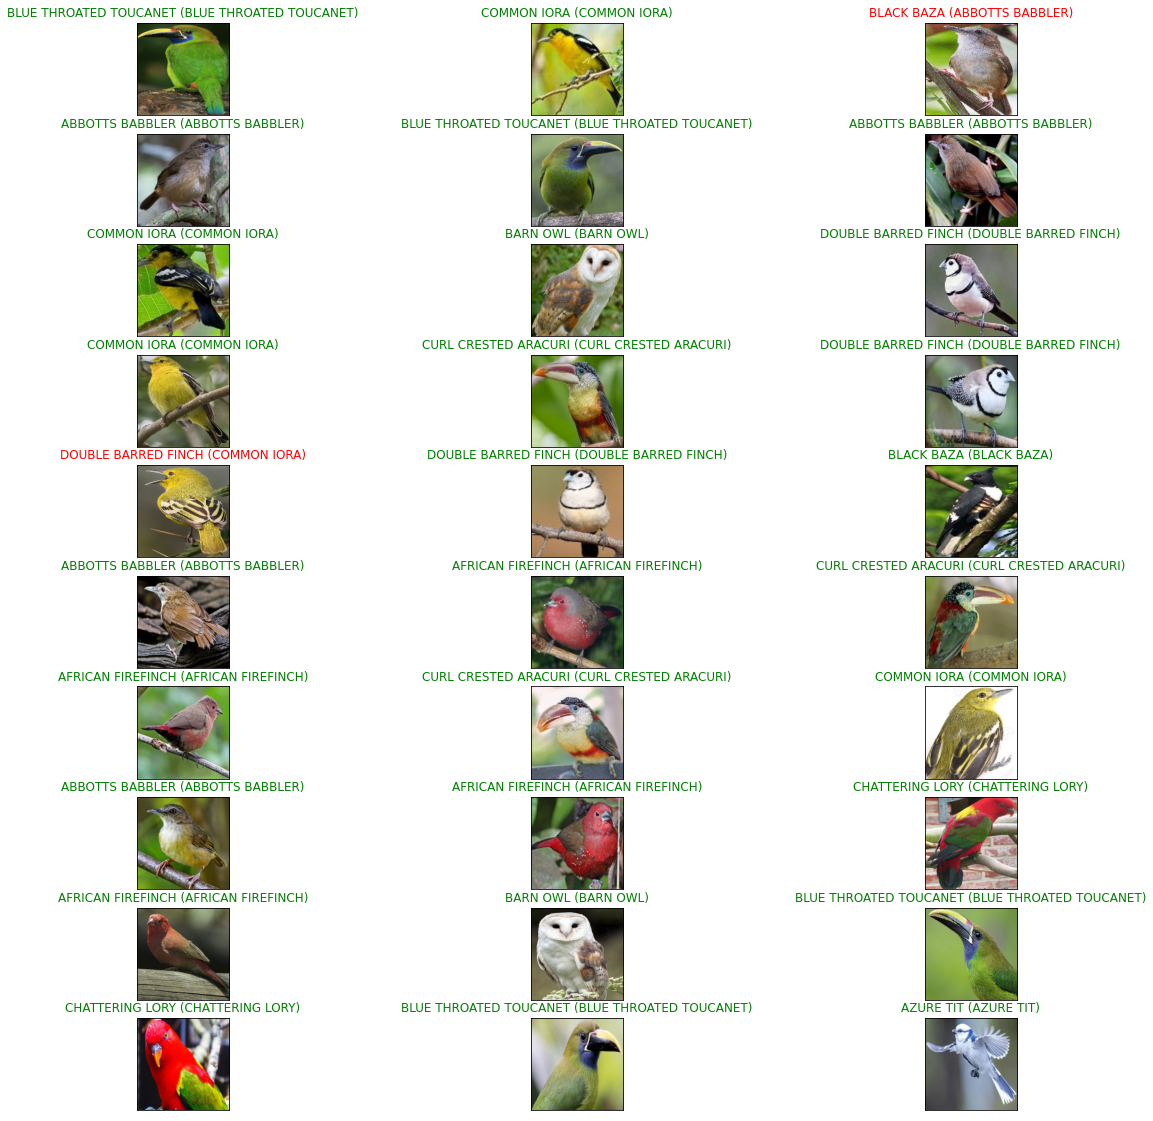

In [14]:
#obtem entradas e saídas de teste
x_test, y_test = next(iter(test_generator))

y_hat = modelo.predict(x_test)

# define os labels (fonte: https://www.cs.toronto.edu/~kriz/cifar.html)
classes = ['ABBOTTS BABBLER', 'AFRICAN FIREFINCH', 'AZURE TIT', 'BARN OWL', 'BLACK BAZA', 
           'BLUE THROATED TOUCANET', 'CHATTERING LORY', 'COMMON IORA', 'CURL CRESTED ARACURI', 'DOUBLE BARRED FINCH'] 
           #CLASSES POSSÍVEIS

# exibe alguns exemplos aleatórios do teste, bem como sua predição e o resultado esperado
fig = plt.figure(figsize=(20, 20))
for i, idx in enumerate(np.random.choice(x_test.shape[0], size=30, replace=False)):
    ax = fig.add_subplot(10, 3, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test[idx]))
    pred_idx = np.argmax(y_hat[idx])
    true_idx = np.argmax(y_test[idx])
    ax.set_title("{} ({})".format(classes[pred_idx], classes[true_idx]),
                 color=("green" if pred_idx == true_idx else "red"))
    

Das 30 imagens geradas, o modelo classificou 28 imagens corretamente. O que foi bem satisfatório.